In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
data=pd.read_csv('Mall_Customers.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
features=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

transform data so that: Mean = 0 Standard Deviation = 1 This ensures that all features are on the same scale, which is important for many machine learning algorithms that are sensitive to feature magnitude (e.g., KMeans, logistic regression, and SVM).

scaler.fit_transform(features): fit(): Computes the mean and standard deviation of each feature in the dataset.

transform(): Standardizes the dataset using the computed mean and standard deviation.

In [11]:
kmeans=KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

Creates a K-Means model that divides the data into 5 clusters (groups).
random_state=42 ensures that the results are consistent every time you run the code.

kmeans.fit(scaled_features)-> model is trained on sclaed features.

In [12]:
features['Cluster']=kmeans.labels_
data['Cluster']=kmeans.labels_

<ipython-input-12-1425893289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster']=kmeans.labels_


Adds a new column called "Cluster" to the features dataset.
Each row in the "Cluster" column gets the cluster label (0, 1, 2, 3, 4) assigned by K-Means.

In [13]:
features.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


In [ ]:
total_clusters=features['Cluster'].value_counts()
total_clusters

,count
Cluster,
0,58
3,45
1,40
4,31
2,26


In [14]:
cluster_profiles = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Profiles:\n", cluster_profiles)

Cluster Profiles:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [15]:
c0=features[features['Cluster']==0]
c1=features[features['Cluster']==1]
c2=features[features['Cluster']==2]
c3=features[features['Cluster']==3]
c4=features[features['Cluster']==4]

In [16]:
c0.describe()
c1.describe()
c2.describe()
c3.describe()
c4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,31.000000,31.000000,31.000000,31.0
mean,44.387097,89.774194,18.483871,4.0
std,8.232770,16.754521,10.194348,0.0
min,32.000000,71.000000,1.000000,4.0
25%,37.000000,78.000000,12.000000,4.0
50%,44.000000,87.000000,17.000000,4.0
75%,49.000000,98.500000,25.000000,4.0
max,59.000000,137.000000,39.000000,4.0


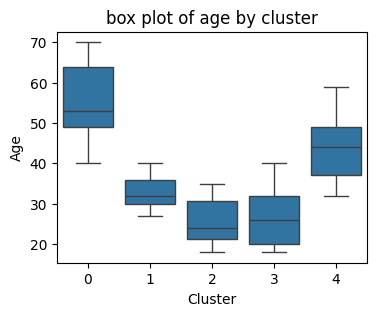

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Cluster', y='Age', data=features)
plt.title('box plot of age by cluster')
plt.show()

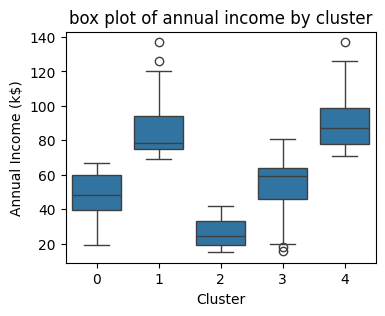

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=features)
plt.title('box plot of annual income by cluster')
plt.show()

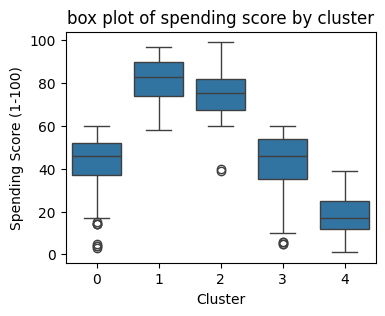

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=features)
plt.title('box plot of spending score by cluster')
plt.show()

Text(0.5, 1.0, 'Distribution of Clusters')

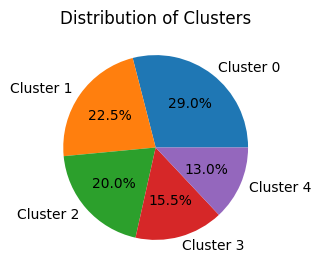

In [ ]:
plt.figure(figsize=(4,3))
plt.pie(total_clusters, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], autopct='%1.1f%%')
plt.title('Distribution of Clusters')

<Figure size 400x300 with 0 Axes>

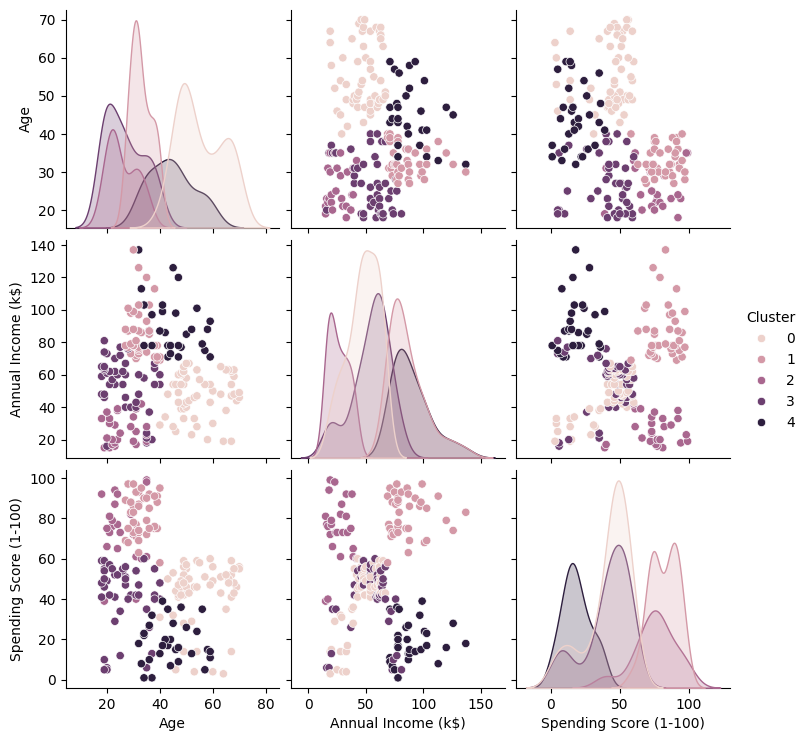

In [ ]:
plt.figure(figsize=(4,3))
sns.pairplot(features, hue='Cluster')

<function matplotlib.pyplot.show(close=None, block=None)>

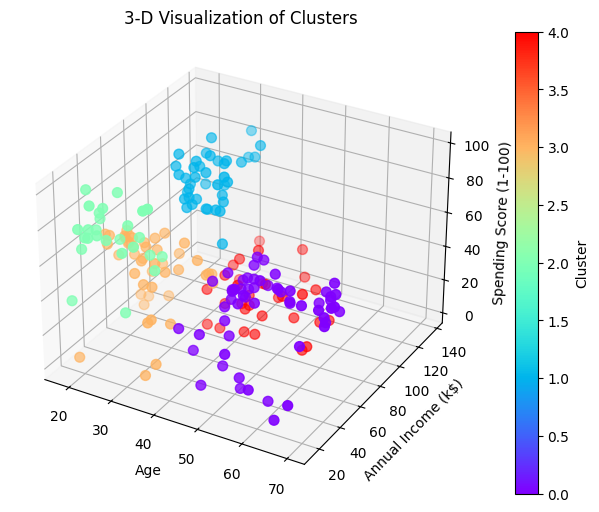

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(11,6))
ax=fig.add_subplot(111, projection= '3d')
scatter=ax.scatter(features['Age'], features['Annual Income (k$)'], features['Spending Score (1-100)'], c=features['Cluster'], cmap='rainbow', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3-D Visualization of Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show

<ipython-input-53-2746313008>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(c0, label='c0', fill=True, color='red')
<ipython-input-53-2746313008>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(c1, label='c1', fill=True, color='grey')
<ipython-input-53-2746313008>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(c2, label='c2', fill=True, color='yellow')
<ipython-input-53-2746313008>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(c3, label='c3', fill=True, color='blue')
<ipython-input-53-2746313008>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(c4, label='c4', fill

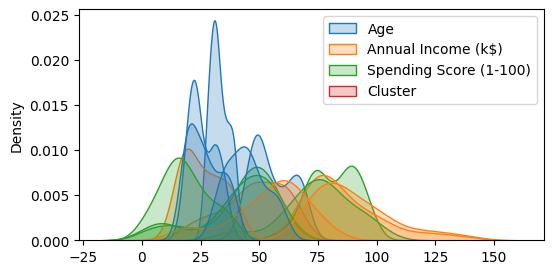

In [ ]:
plt.figure(figsize=(6,3))
sns.kdeplot(c0, label='c0', fill=True, color='red')
sns.kdeplot(c1, label='c1', fill=True, color='grey')
sns.kdeplot(c2, label='c2', fill=True, color='yellow')
sns.kdeplot(c3, label='c3', fill=True, color='blue')
sns.kdeplot(c4, label='c4', fill=True, color='green')
plt.show()

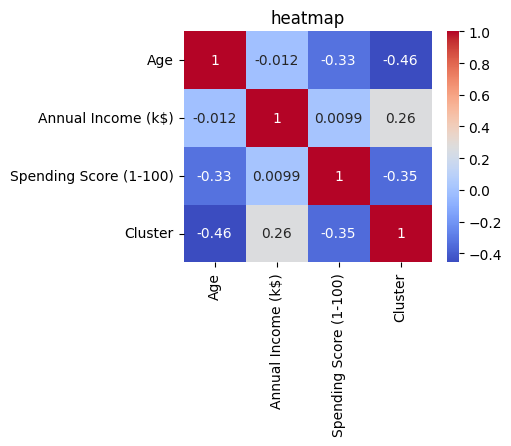

In [ ]:
plt.figure(figsize=(4,3))
correlation_matrix=features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('heatmap')
plt.show()

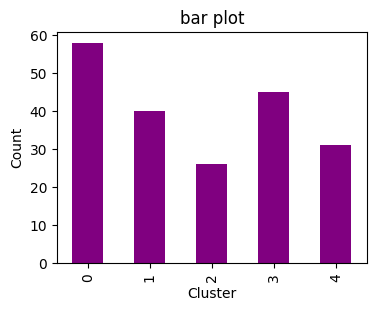

In [ ]:
plt.figure(figsize=(4,3))
sorted_clusters=total_clusters.sort_index()
sorted_clusters.plot(kind='bar', color='purple')
plt.title('bar plot')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

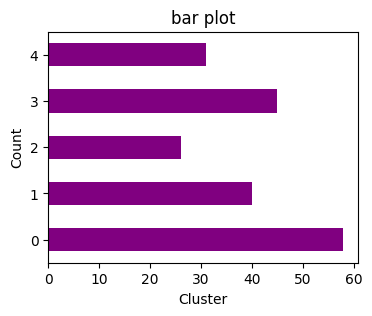

In [ ]:
plt.figure(figsize=(4,3))
sorted_clusters.plot(kind='barh', color='purple')
plt.title('bar plot')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

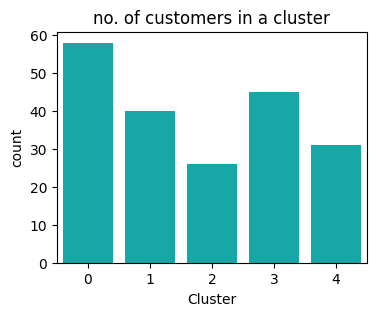

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x='Cluster', data=features, color='c')
plt.title('no. of customers in a cluster')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(features, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')
fig.update_layout(title='3D Interactive Plot')
fig.show()

<ipython-input-59-425771956>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




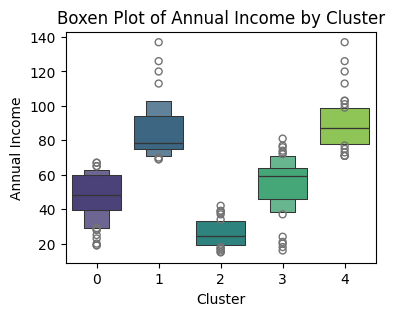

In [ ]:
plt.figure(figsize=(4,3))
sns.boxenplot(x='Cluster', y='Annual Income (k$)', data=features, palette='viridis')
plt.title('Boxen Plot of Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income')
plt.show()

<ipython-input-60-2056302095>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




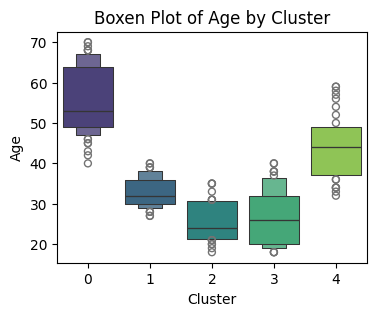

In [ ]:
plt.figure(figsize=(4,3))
sns.boxenplot(x='Cluster', y='Age', data=features, palette='viridis')
plt.title('Boxen Plot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

<ipython-input-61-3379506464>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




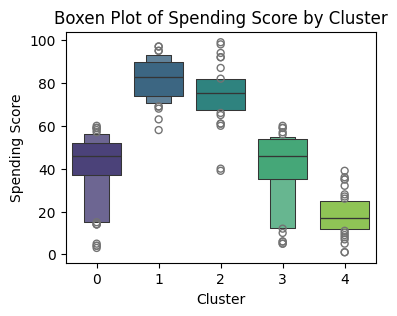

In [ ]:
plt.figure(figsize=(4,3))
sns.boxenplot(x='Cluster', y='Spending Score (1-100)', data=features, palette='viridis')
plt.title('Boxen Plot of Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.show()

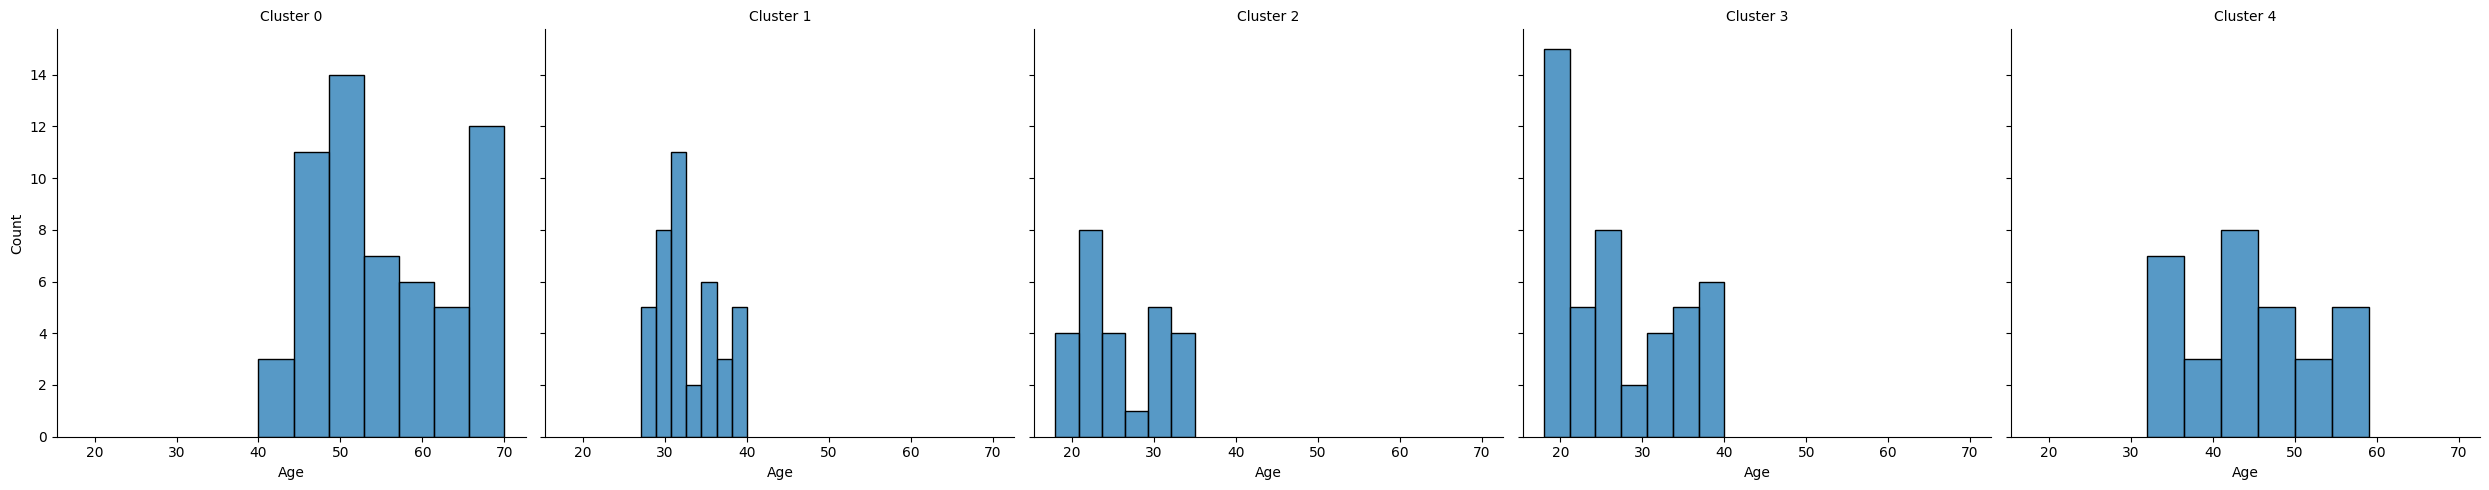

In [ ]:
g = sns.FacetGrid(features, col="Cluster", height=5, aspect=1)
g.map_dataframe(sns.histplot, 'Age')
g.set_titles("Cluster {col_name}")
g.set_axis_labels("Age")
plt.show()

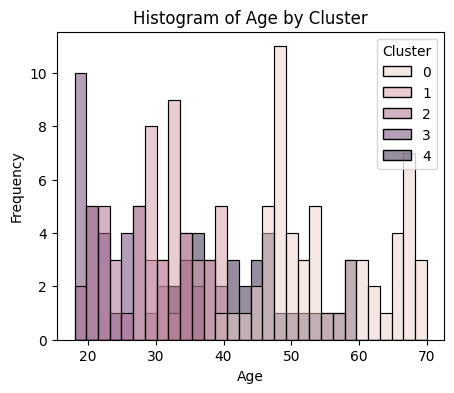

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=features, x='Age', hue='Cluster', bins=30)
plt.title('Histogram of Age by Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

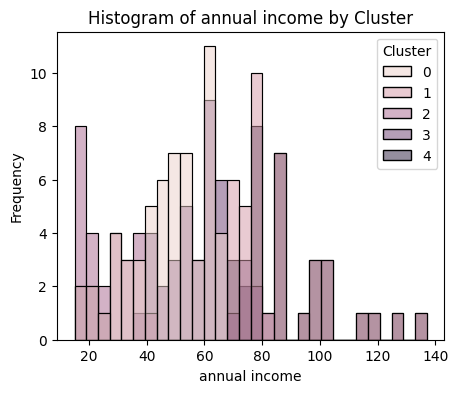

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=features, x='Annual Income (k$)', hue='Cluster', bins=30)
plt.title('Histogram of annual income by Cluster')
plt.xlabel('annual income')
plt.ylabel('Frequency')
plt.show()

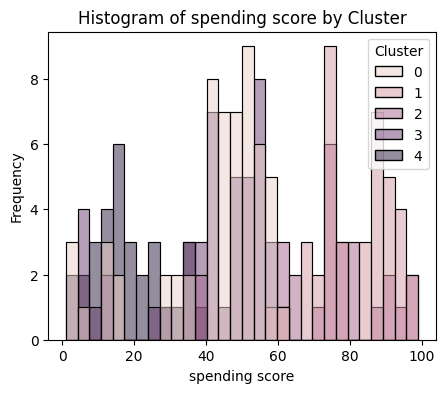

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=features, x='Spending Score (1-100)', hue='Cluster', bins=30)
plt.title('Histogram of spending score by Cluster')
plt.xlabel('spending score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(kmeans.cluster_centers_)

[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


3x5 matrix having centroid values

3-rows-as we have 3 features, 5-columns-as cluster size=5

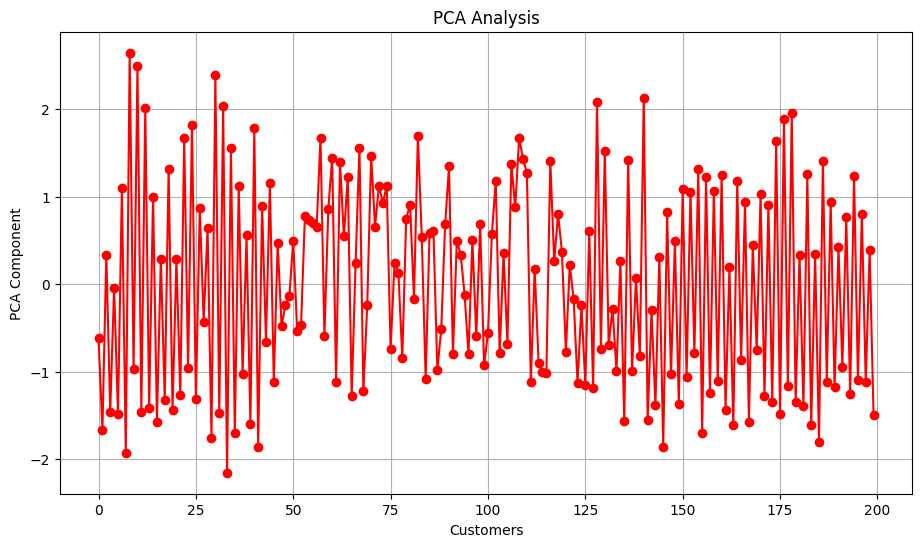

In [ ]:
plt.figure(figsize=(11,6))
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca_result=pca.fit_transform(scaled_features)
plt.plot(pca_result, marker='o', linestyle='-', color='red')
plt.xlabel('Customers')
plt.ylabel('PCA Component')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

`Elbow Method to Find Optimal k`

In [ ]:
n=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  n.append(kmeans.inertia_)

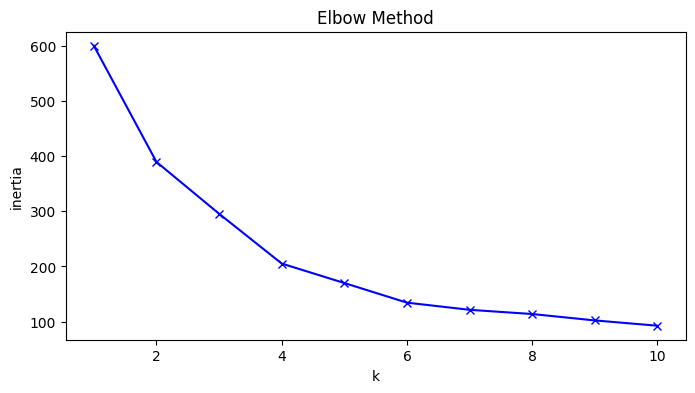

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), n, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

k = 4 is the elbow point — this is where the "bend" in the curve is most noticeable. It's the optimal number of clusters to use in KMeans model.

`Silhouette Score for Cluster Validation`

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  labels=kmeans.fit_predict(scaled_features)
  score=silhouette_score(scaled_features, labels)
  print(f"for n_clusters={k}, silhouette score is {score:.4f}")

for n_clusters=2, silhouette score is 0.3355
for n_clusters=3, silhouette score is 0.3579
for n_clusters=4, silhouette score is 0.4040
for n_clusters=5, silhouette score is 0.4085
for n_clusters=6, silhouette score is 0.4311
for n_clusters=7, silhouette score is 0.4101
for n_clusters=8, silhouette score is 0.3674
for n_clusters=9, silhouette score is 0.3744
for n_clusters=10, silhouette score is 0.3619


The highest score is at k = 6 with a value of 0.4311, which suggests that 6 clusters produce the best-defined groups based on inter- and intra-cluster distances.

`PCA : Principal Component Analysis`

Reduces your 3D feature space to 2D (n_components=2) while preserving as much variance (information) as possible.





In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_components=pca.fit_transform(scaled_features)
pca_df=pd.DataFrame(data=pca_components, columns= ['PCA1', 'PCA2'])
pca_df['Clusters']=kmeans.labels_

In [18]:
pca_df.head()

,PCA1,PCA2,Clusters
0,-0.615720,-1.763481,2
1,-1.665793,-1.820747,2
2,0.337862,-1.674799,3
3,-1.456573,-1.772430,2
4,-0.038465,-1.662740,2


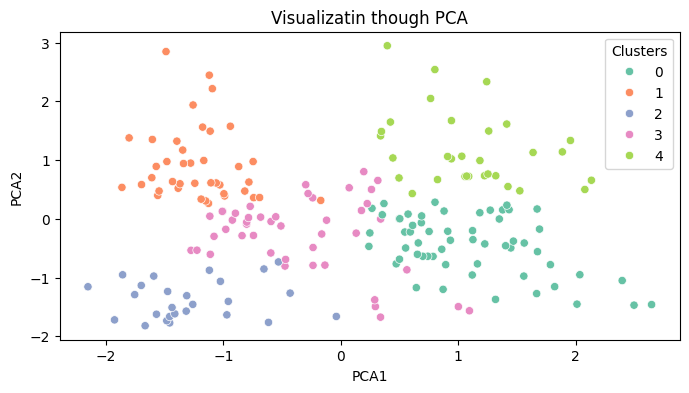

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='PCA1',y='PCA2',hue='Clusters',data=pca_df, palette='Set2')
plt.title('Visualizatin though PCA')
plt.show()

The original dataset used three numerical features—Age, Annual Income (k$), and Spending Score (1-100)—to represent each customer in a three-dimensional feature space. These features were scaled and used to perform clustering using the KMeans algorithm. However, since it's difficult to visualize clusters in 3D, Principal Component Analysis (PCA) was applied to reduce the data from three dimensions to two. PCA generates two new features, called PCA1 and PCA2, which are linear combinations of the original variables and are designed to capture the maximum variance in the dataset. This dimensionality reduction allows us to visualize the clusters clearly in a 2D scatter plot while retaining most of the important information from the original data.

`DBSCAN Clustering`

In [20]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5, min_samples=3)
dbscan_labels=dbscan.fit_predict(scaled_features)

In [21]:
data['DBSCAN_clusters']=dbscan_labels

In [22]:
print('DBSCAN clusters:',np.unique(dbscan_labels))
print('cluster counts:\n',pd.Series(dbscan_labels).value_counts())

DBSCAN clusters: [-1  0  1  2  3  4  5  6  7]
cluster counts:
  1    90
 3    34
-1    32
 0    18
 4    10
 6     5
 2     4
 5     4
 7     3
Name: count, dtype: int64


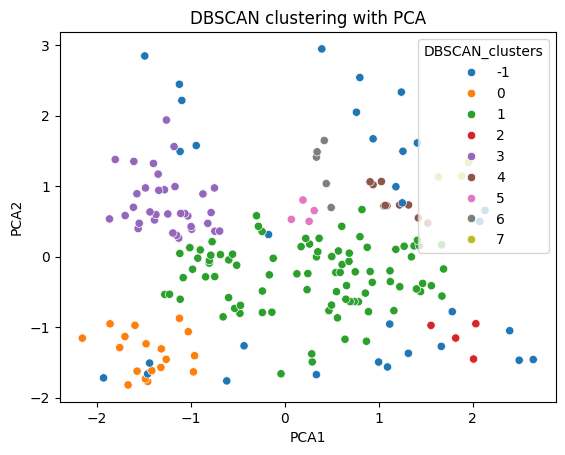

In [23]:
pca_df['DBSCAN_clusters']=dbscan_labels
sns.scatterplot(x='PCA1',y='PCA2',hue='DBSCAN_clusters',data=pca_df, palette='tab10')
plt.title('DBSCAN clustering with PCA')
plt.show()

`Agglomerative Clustering`

In [24]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3)
agg_labels=agg.fit_predict(scaled_features)

In [25]:
data['Agg_Clusters']=agg_labels

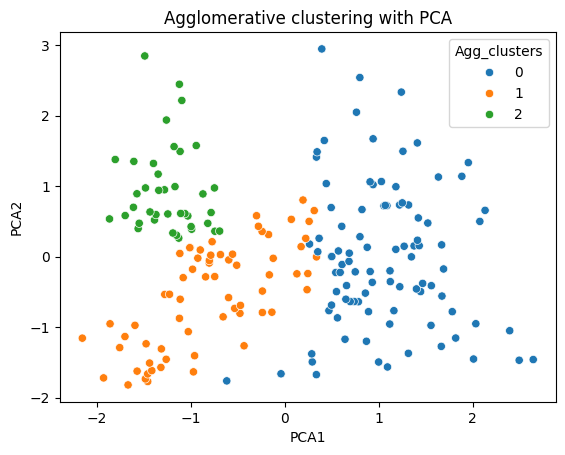

In [26]:
pca_df['Agg_clusters']=agg_labels
sns.scatterplot(x='PCA1',y='PCA2',hue='Agg_clusters',data=pca_df, palette='tab10')
plt.title('Agglomerative clustering with PCA')
plt.show()

`Comparison between KMeans DBSCAN Agglomerative wrt silhouette_score`

In [27]:
from sklearn.metrics import silhouette_score
kmeans_score=silhouette_score(scaled_features, kmeans.labels_)
dbscan_score=silhouette_score(scaled_features, dbscan_labels)
agg_score=silhouette_score(scaled_features, agg_labels)

In [28]:
print('Silhouette scores:')
print(f'KMeans: {kmeans_score:.4f}')
print(f'DBSCAN: {dbscan_score:.4f}')
print(f'Agglomerative: {agg_score:.4f}')

Silhouette scores:
KMeans: 0.4085
DBSCAN: 0.1316
Agglomerative: 0.3215


KMeans achieved the highest silhouette score (0.3579), indicating the best clustering performance among the three algorithms.

DBSCAN performed poorly (0.1316)

While Agglomerative Clustering was fairly good (0.3215), but not better than KMeans.

In [29]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_clusters,Agg_Clusters
0,1,Male,19,15,39,2,-1,0
1,2,Male,21,15,81,2,0,1
2,3,Female,20,16,6,3,-1,0
3,4,Female,23,16,77,2,0,1
4,5,Female,31,17,40,2,1,0


In [30]:
cluster_reasoning = {
    0: ("Sensible Seniors", "Older adults with average income and moderate spending habits."),
    1: ("Affluent Big Spenders", "Middle-aged individuals with high income and high spending behavior."),
    2: ("Young Value Shoppers", "Very young customers who spend a lot despite low income."),
    3: ("Young Professionals", "Young adults with decent income and balanced spending."),
    4: ("Wealthy Minimalists", "Older, high-income customers who spend conservatively.")
}

In [31]:
name_map = {k: v[0] for k, v in cluster_reasoning.items()}
reason_map = {k: v[1] for k, v in cluster_reasoning.items()}

data['Segment Name'] = data['Cluster'].map(name_map)
data['Segment Reasoning'] = data['Cluster'].map(reason_map)


In [32]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_clusters,Agg_Clusters,Segment Name,Segment Reasoning
0,1,Male,19,15,39,2,-1,0,Young Value Shoppers,Very young customers who spend a lot despite l...
1,2,Male,21,15,81,2,0,1,Young Value Shoppers,Very young customers who spend a lot despite l...
2,3,Female,20,16,6,3,-1,0,Young Professionals,Young adults with decent income and balanced s...
3,4,Female,23,16,77,2,0,1,Young Value Shoppers,Very young customers who spend a lot despite l...
4,5,Female,31,17,40,2,1,0,Young Value Shoppers,Very young customers who spend a lot despite l...


Predicting Cluster

In [33]:
X=data[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
y=data['Cluster']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Randon Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Prediction 01

In [44]:
new_customer = [[29, 58, 65]]
predicted_cluster = model.predict(new_customer)[0]
segment_name = name_map[predicted_cluster]
segment_reason = reason_map[predicted_cluster]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(f"Predicted Cluster: {predicted_cluster}")
print(segment_name)
print(segment_reason)

Predicted Cluster: 2
Young Value Shoppers
Very young customers who spend a lot despite low income.


Prediction 02

In [49]:
new_customer = [[49, 58, 65]]
predicted_cluster = model.predict(new_customer)[0]
segment_name = name_map[predicted_cluster]
segment_reason = reason_map[predicted_cluster]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
print(f"Predicted Cluster: {predicted_cluster}")
print(segment_name)
print(segment_reason)

Predicted Cluster: 0
Sensible Seniors
Older adults with average income and moderate spending habits.


Prediction 03

In [51]:
new_customer = [[49, 97, 65]]
predicted_cluster = model.predict(new_customer)[0]
segment_name = name_map[predicted_cluster]
segment_reason = reason_map[predicted_cluster]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
print(f"Predicted Cluster: {predicted_cluster}")
print(segment_name)
print(segment_reason)

Predicted Cluster: 1
Affluent Big Spenders
Middle-aged individuals with high income and high spending behavior.
